In [69]:
import math
import matplotlib.pyplot as plt

In [70]:
x_knot = [0.1*math.pi, 0.2*math.pi, 0.3*math.pi, 0.4*math.pi]
y_knot = [math.sin(x_knot[0]), math.sin(x_knot[1]), math.sin(x_knot[2]), math.sin(x_knot[3])]
count = 100
h = (x_knot[3] - x_knot[0]) / count

In [71]:
def lagrange(x_knot, y_knot, h):
    x = [x_knot[0]]
    Lag = [y_knot[0]]
    for n in range(count):
        x.append(x[-1] + h)
        Lag_i = 0
        for i in range(len(x_knot)):
            l = 1
            for j in range(len(x_knot)):
                if j == i:
                    continue
                l *= (x[-1] - x_knot[j]) / (x_knot[i] - x_knot[j])
            Lag_i += y_knot[i] * l
        Lag.append(Lag_i)
    return x, Lag

In [72]:
def divided_diff(x_knot, y_knot):
    f = []
    for i in range(len(x_knot)):
        f.append([])
    for i in range(len(x_knot)):
        f[i].append(y_knot[i])

    for j in range(1, len(x_knot)): # Order of the divided difference
        for i in range(len(x_knot)):
            if i < len(x_knot) - j:
                f[i].append((f[i + 1][j - 1] - f[i][j - 1]) / (x_knot[i + j] - x_knot[i]))
    return f

In [73]:
def newton(x_knot, y_knot, h):
    x = [x_knot[0]]
    New = [y_knot[0]]
    f = divided_diff(x_knot, y_knot)
    for n in range(count):
        x.append(x[-1] + h)
        New_i = y_knot[0]
        mult = 1
        for i in range(1, len(x_knot)):
            mult *= (x[-1] - x_knot[i - 1])
            New_i += mult * f[0][i]
        New.append(New_i)
    return x, New

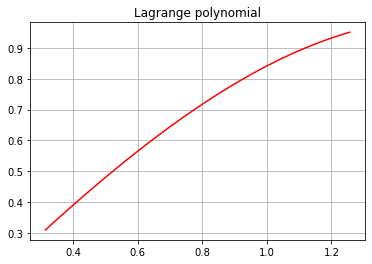

In [74]:
x = []
Lag = []
x, Lag = lagrange(x_knot, y_knot, h)

plt.grid(True)
plt.title('Lagrange polynomial')
plt.plot(x, Lag, 'red')
plt.show()

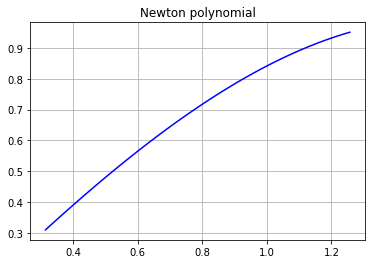

In [75]:
x = []
New = []
x, New = newton(x_knot, y_knot, h)

plt.grid(True)
plt.title('Newton polynomial')
plt.plot(x, New, 'blue')
plt.show()